In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, beta

# Load the original CSV file
file_path = 'Employee_testdata_with_performance.csv'
df = pd.read_csv(file_path)

# Define the number of samples
num_samples = df.shape[0]

# Define the correlation matrix for the copula
correlation_matrix = np.array([
    [1, 0.8, 0.5],
    [0.8, 1, 0.6],
    [0.5, 0.6, 1]
])

# Generate samples from a multivariate normal distribution
mean = [0, 0, 0]
mv_samples = np.random.multivariate_normal(mean, correlation_matrix, num_samples)

# Convert the normal samples to uniform samples using the CDF of the normal distribution
uniform_samples = norm.cdf(mv_samples)

# Convert the uniform samples to the desired distribution (Beta in this case)
team_engagement = beta.ppf(uniform_samples[:, 0], 2, 5)
collaboration = beta.ppf(uniform_samples[:, 1], 2, 5)
flexibility = beta.ppf(uniform_samples[:, 2], 2, 5)

# Create a DataFrame for the synthetic data
synthetic_df = pd.DataFrame({
    'TeamEngagement': team_engagement,
    'Collaboration': collaboration,
    'Flexibility': flexibility
})

# Merge the synthetic data with the original data
df_updated = pd.concat([df, synthetic_df], axis=1)

# Save the updated DataFrame to a new CSV file
updated_file_path = 'Employee_testdata_with_synthetic_behavior_copula_1.csv'
df_updated.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataframe
df_updated.head()


,EmployeeID,Education,JoiningYear,City,Country,Region,PaymentTier,Age,Gender,ExperienceInCurrentDomain,Performance,TeamEngagement,Collaboration,Flexibility
0,1,Bachelors,2017,Toronto,Canada,North America,3,34,Male,0,74.967142,0.364213,0.370903,0.229764
1,2,Bachelors,2013,Pune,India,Asia,1,28,Female,3,68.617357,0.136338,0.206864,0.344448
2,3,Bachelors,2014,New Delhi,India,Asia,3,38,Female,2,76.476885,0.331873,0.135275,0.097913
3,4,Masters,2016,Vancouver,Canada,North America,3,27,Male,5,85.230299,0.262063,0.365951,0.295131
4,5,Masters,2017,Berlin,Germany,Europe,3,24,Male,2,67.658466,0.580079,0.370607,0.414846


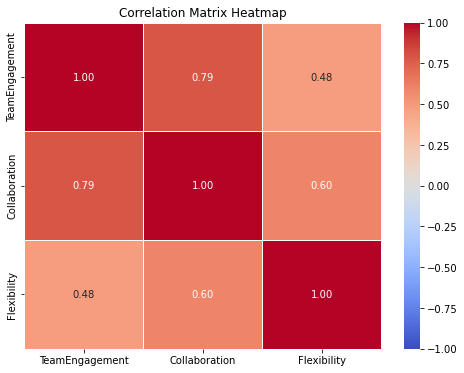

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the synthetic data
corr_matrix = synthetic_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


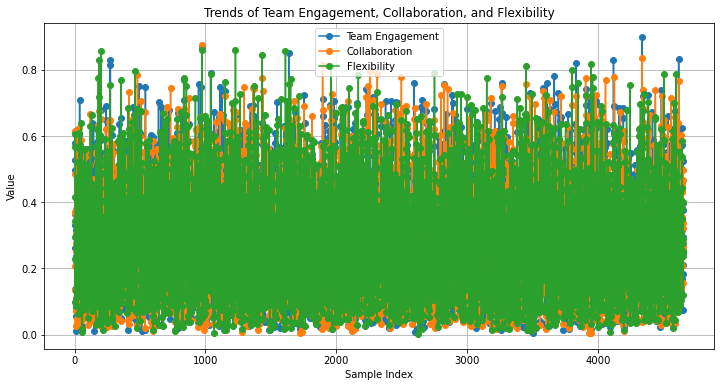

In [3]:
plt.figure(figsize=(12, 6))

# Plot lines for each variable
plt.plot(synthetic_df.index, synthetic_df['TeamEngagement'], label='Team Engagement', marker='o')
plt.plot(synthetic_df.index, synthetic_df['Collaboration'], label='Collaboration', marker='o')
plt.plot(synthetic_df.index, synthetic_df['Flexibility'], label='Flexibility', marker='o')

# Adding titles and labels
plt.title('Trends of Team Engagement, Collaboration, and Flexibility')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


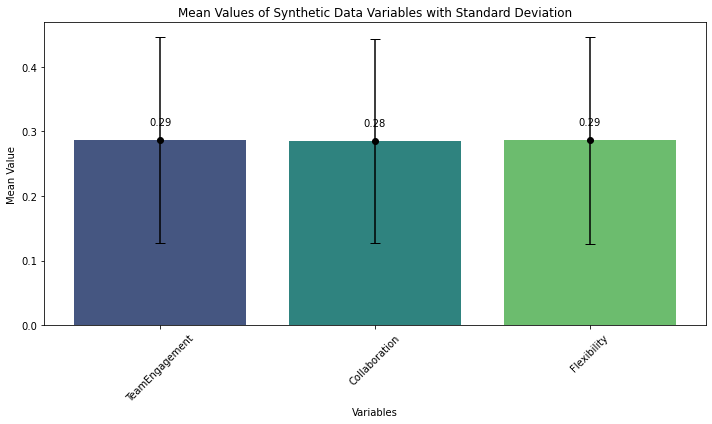

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean values and standard deviations for each variable
mean_values = synthetic_df.mean()
std_values = synthetic_df.std()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Variable': mean_values.index,
    'Mean': mean_values.values,
    'Standard Deviation': std_values.values
})

plt.figure(figsize=(10, 6))

# Create a bar plot with error bars
bar_plot = sns.barplot(x='Variable', y='Mean', data=plot_df, palette='viridis', ci=None)

# Add error bars
for index, value in enumerate(plot_df['Mean']):
    plt.errorbar(index, value, yerr=plot_df['Standard Deviation'][index], fmt='o', color='black', capsize=5)

# Add annotations for mean values
for index, value in enumerate(plot_df['Mean']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

# Set titles and labels
plt.title('Mean Values of Synthetic Data Variables with Standard Deviation')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

plt.show()

